In [22]:
!pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy import integrate

In [13]:
df = pd.read_csv("train.csv")
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
#Basic information (data types, nulls)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
#Summary statistics (descriptive stats)
print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [18]:
#checking missing values

print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [19]:
#Summary interpretation of results
#features and target variables (price?)
print(df.columns)
#Features are the columns used as input variables
#target variable (the column to predict)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


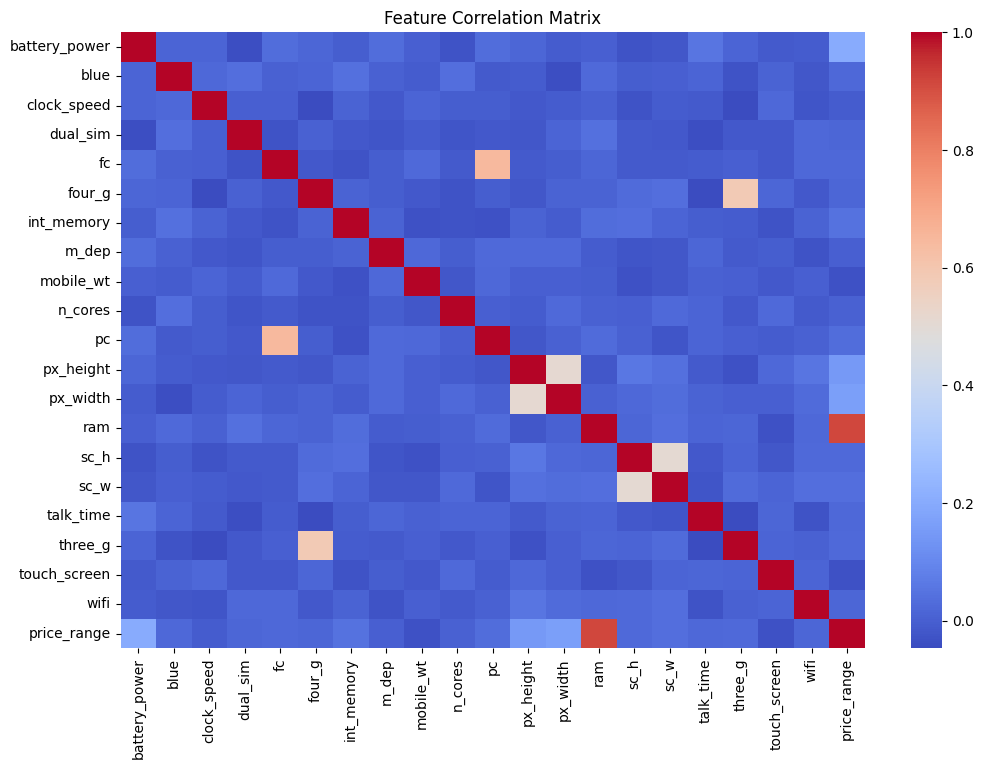

In [20]:
import matplotlib.pyplot as plt
#Visual Overview - Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

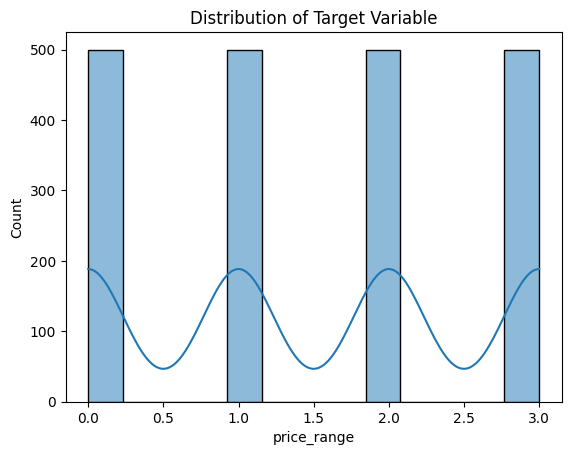

In [24]:
#Distribution of target variable
sns.histplot(df['price_range'], kde=True)
plt.title("Distribution of Target Variable")
plt.show()

In [26]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [27]:
central_tendency = df.describe().loc[['mean', '50%']]  # '50%' is the median
print("Central Tendency:\n", central_tendency)
mode_vals = df.mode().iloc[0]  # take the first mode if multiple
print("\nMode of each column:\n", mode_vals)

Central Tendency:
       battery_power   blue  clock_speed  dual_sim      fc  four_g  int_memory  \
mean      1238.5185  0.495      1.52225    0.5095  4.3095  0.5215     32.0465   
50%       1226.0000  0.000      1.50000    1.0000  3.0000  1.0000     32.0000   

        m_dep  mobile_wt  n_cores  ...  px_height   px_width       ram  \
mean  0.50175    140.249   4.5205  ...    645.108  1251.5155  2124.213   
50%   0.50000    141.000   4.0000  ...    564.000  1247.0000  2146.500   

         sc_h   sc_w  talk_time  three_g  touch_screen   wifi  price_range  
mean  12.3065  5.767     11.011   0.7615         0.503  0.507          1.5  
50%   12.0000  5.000     11.000   1.0000         1.000  1.000          1.5  

[2 rows x 21 columns]

Mode of each column:
 battery_power     618.0
blue                0.0
clock_speed         0.5
dual_sim            1.0
fc                  0.0
four_g              1.0
int_memory         27.0
m_dep               0.1
mobile_wt         182.0
n_cores             4

In [28]:
range_vals = df.max(numeric_only=True) - df.min(numeric_only=True)
variance_vals = df.var(numeric_only=True)
std_dev_vals = df.std(numeric_only=True)
print("\nRange:\n", range_vals)
print("\nVariance:\n", variance_vals)
print("\nStandard Deviation:\n", std_dev_vals)


Range:
 battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

Variance:
 battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w      

In [29]:
skew_vals = df.skew(numeric_only=True)
kurtosis_vals = df.kurtosis(numeric_only=True)

print("\nSkewness:\n", skew_vals)
print("\nKurtosis:\n", kurtosis_vals)


Skewness:
 battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

Kurtosis:
 battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523

In [26]:
from scipy.stats import f_oneway
grouped = [group['battery_power'].values for name, group in df.groupby('price_range')]
f_stat, p_val = f_oneway(*grouped)
print("\nANOVA result for battery_power across price_range groups:")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
# p < 0.05 suggests a statistically significant difference.

from scipy.stats import pearsonr

# Example: correlation with Price
target = 'price_range'
correlations = {}

for col in df.select_dtypes(include=np.number).columns:
    if col != target:
        r, p = pearsonr(df[col], df[target])
        correlations[col] = {'Pearson r': r, 'p-value': p}

correlation_df = pd.DataFrame(correlations).T.sort_values('Pearson r', ascending=False)
print("\nFeature-Target Correlations:\n", correlation_df)




ANOVA result for battery_power across price_range groups:
F-statistic: 31.5982, p-value: 0.0000

Feature-Target Correlations:
                Pearson r       p-value
ram             0.917046  0.000000e+00
battery_power   0.200723  1.264854e-19
px_width        0.165818  8.478969e-14
px_height       0.148858  2.227806e-11
int_memory      0.044435  4.693006e-02
sc_w            0.038711  8.348974e-02
pc              0.033599  1.330736e-01
three_g         0.023611  2.912366e-01
sc_h            0.022986  3.042032e-01
fc              0.021998  3.254629e-01
talk_time       0.021859  3.285375e-01
blue            0.020573  3.577985e-01
wifi            0.018785  4.011152e-01
dual_sim        0.017444  4.355602e-01
four_g          0.014772  5.091037e-01
n_cores         0.004399  8.441253e-01
m_dep           0.000853  9.695879e-01
clock_speed    -0.006606  7.678151e-01
mobile_wt      -0.030302  1.755393e-01
touch_screen   -0.030411  1.739918e-01


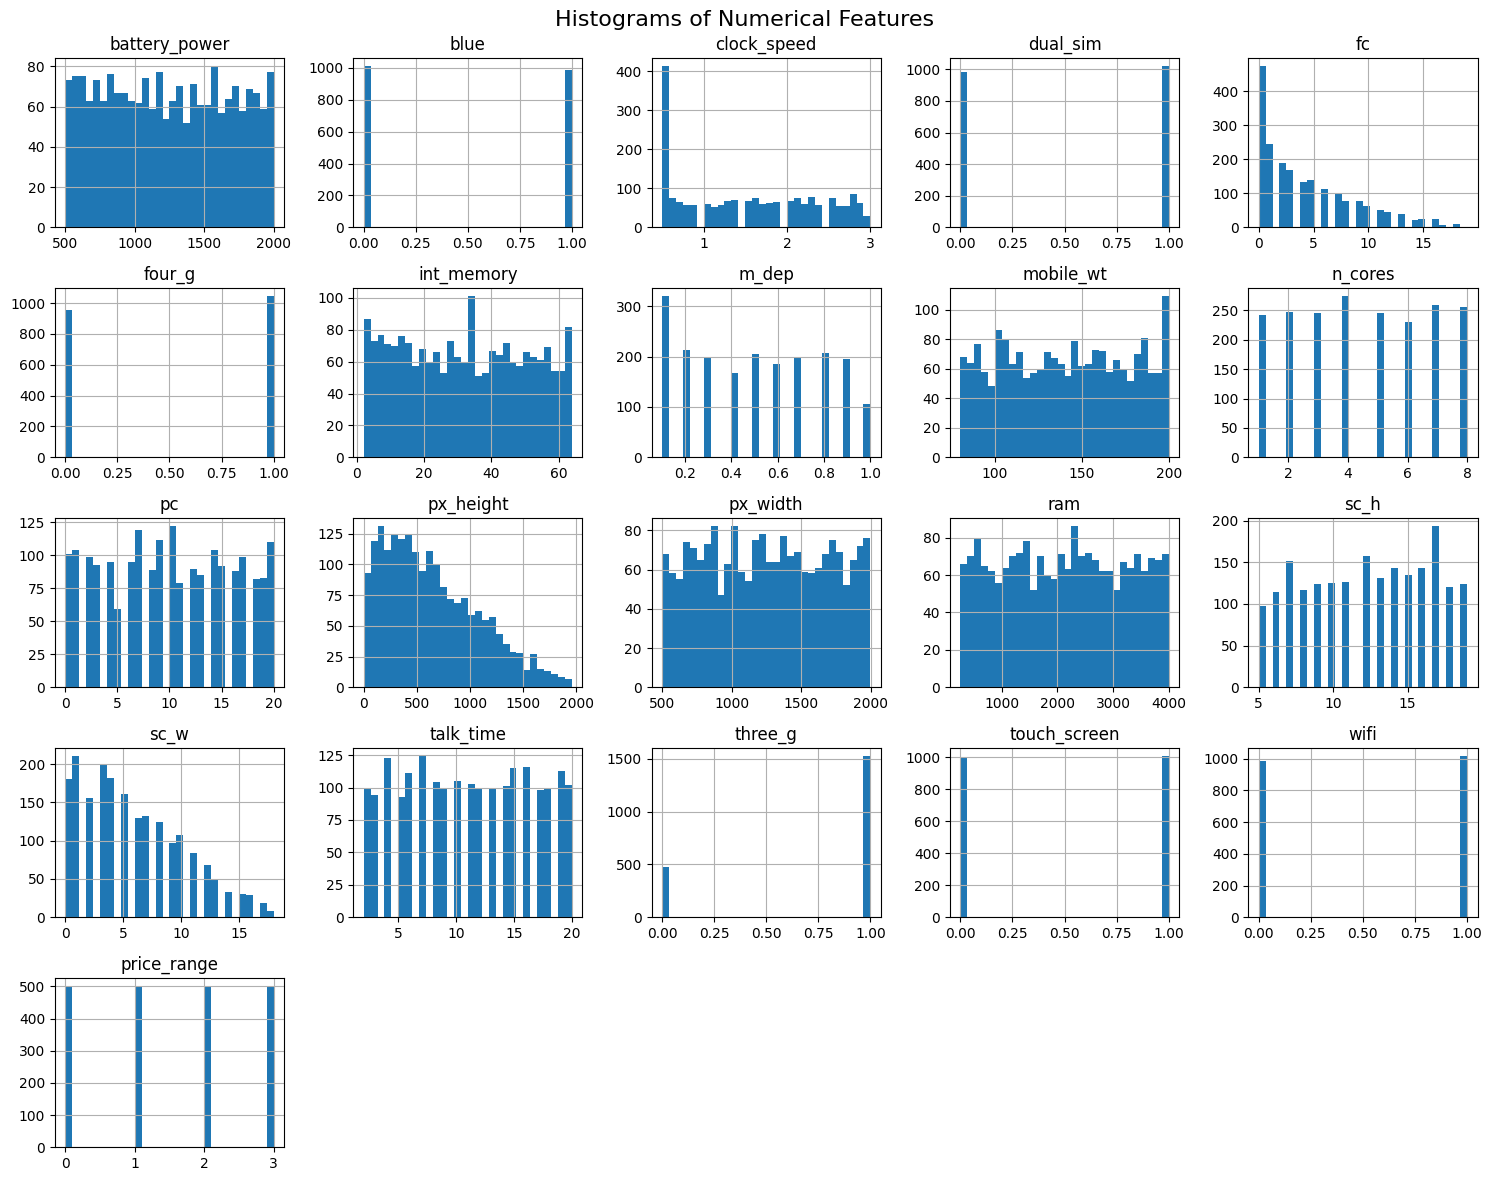

In [31]:
#Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
#Employ heatmaps for correlation visualization.
#Ensure clarity in plots with appropriate titles, labels, and axis information.

df.select_dtypes(include='number').hist(figsize=(15, 12), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#Derive conclusions from statistical tests and visualizations.
#Identify key determinants in mobile price classification.
#Highlight any unexpected or significant findings.

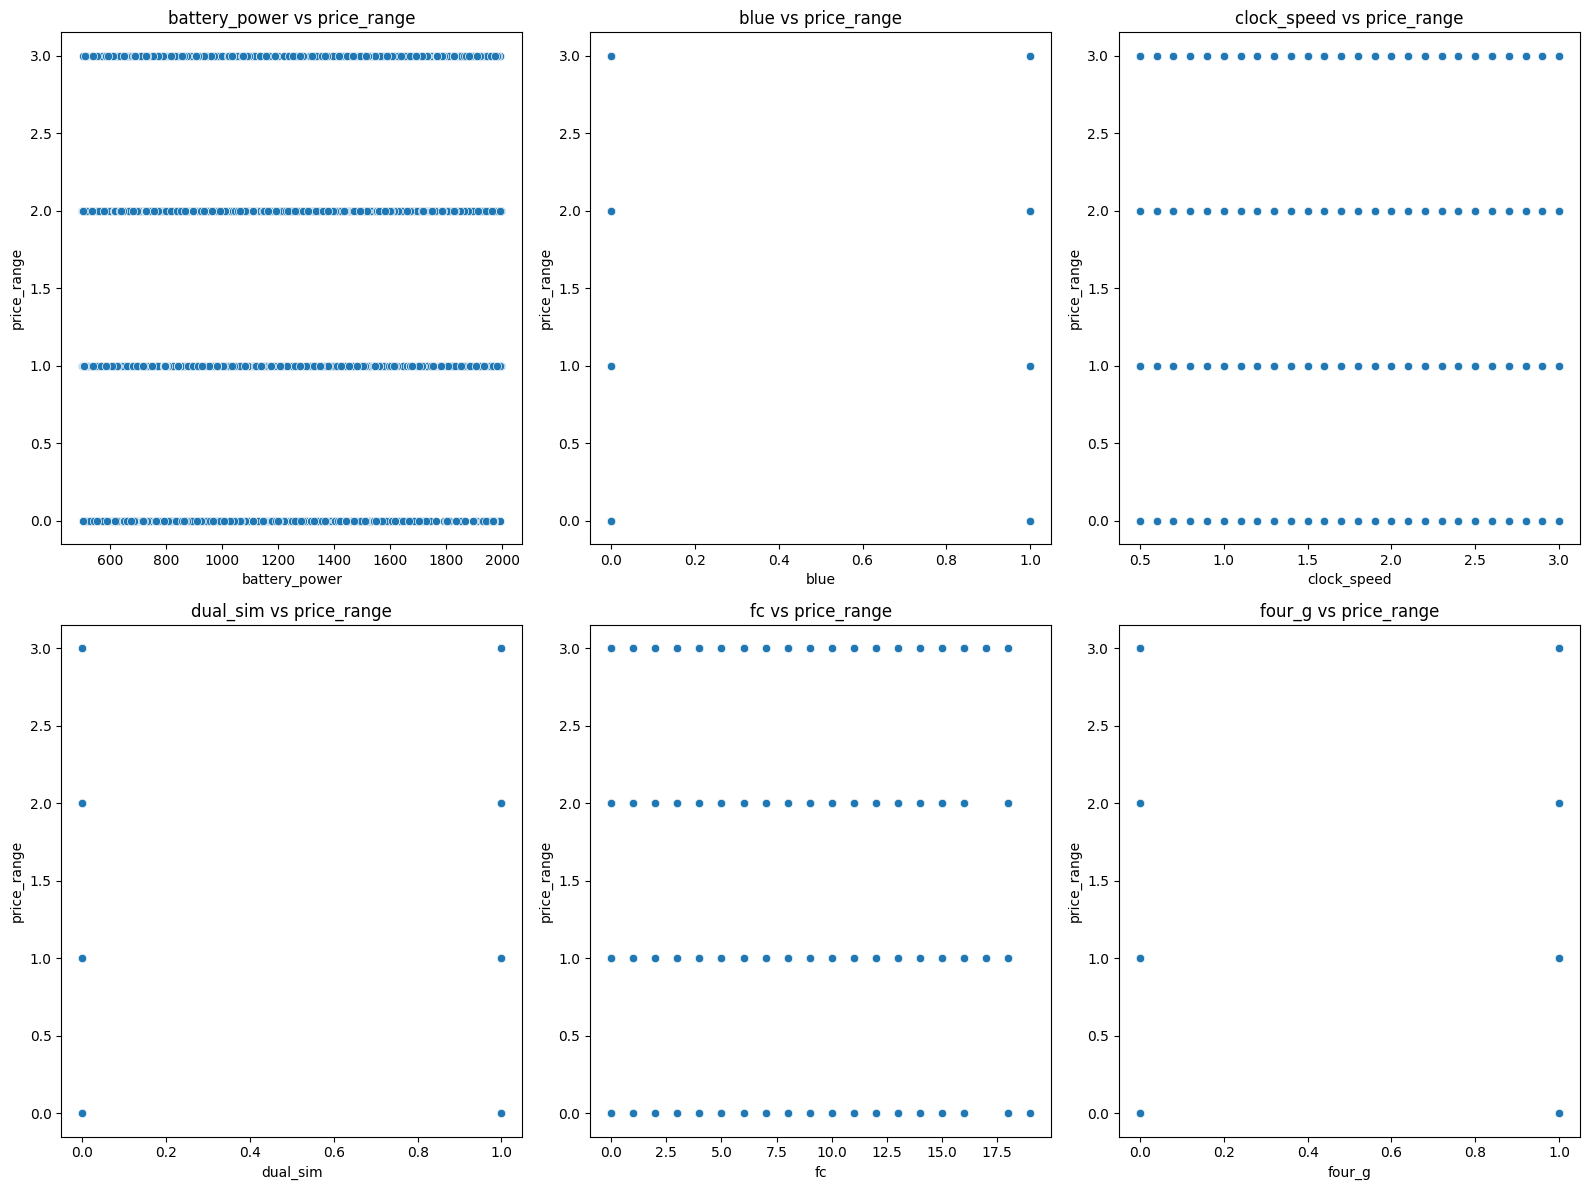

In [24]:
#Scatter Plots — Relationship Between Features and Target
#Example: Plot numerical features against Price (or your actual target)
target_col = 'price_range'  # Replace with your actual target column

numerical_cols = df.select_dtypes(include='number').columns.drop(target_col)

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols[:6], 1):  # adjust [:6] as needed
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df[target_col])
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)

plt.tight_layout()
plt.show()

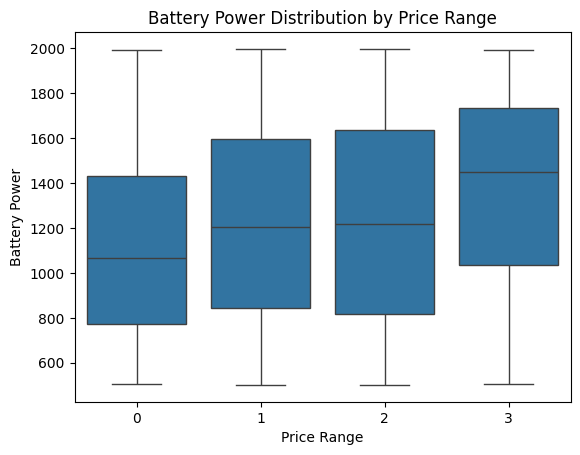

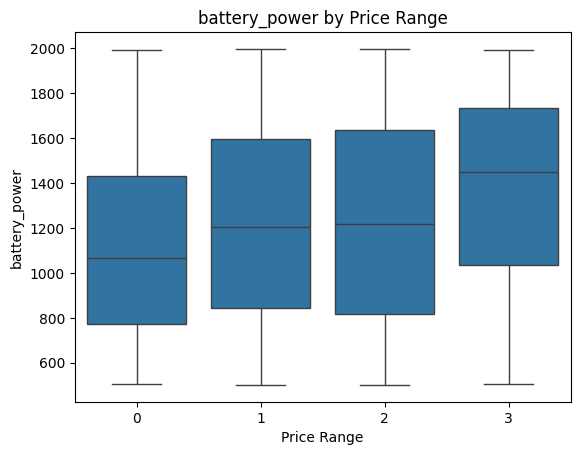

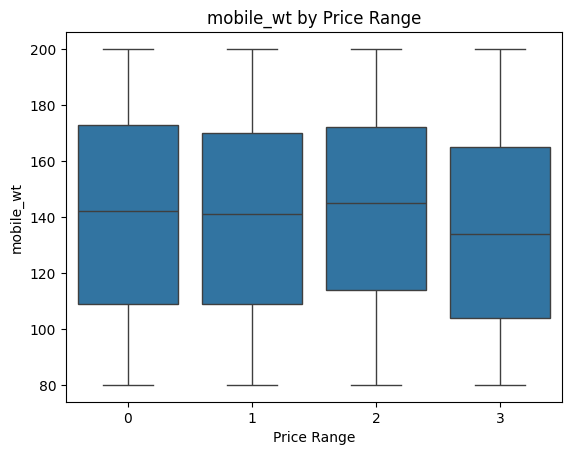

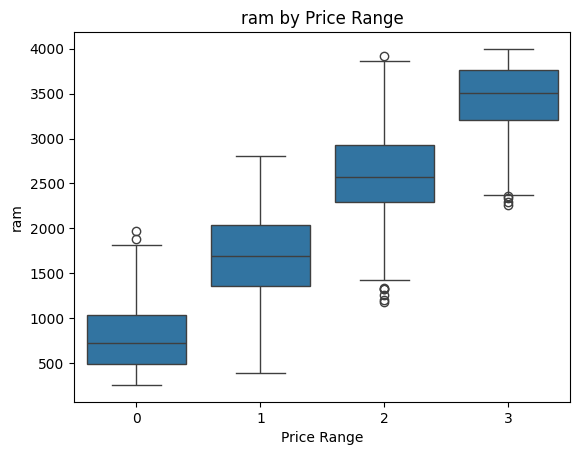

In [18]:
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()
#Use box plots for multiple features if needed:

for col in ['battery_power', 'mobile_wt', 'ram']:
    plt.figure()
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'{col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    plt.show()

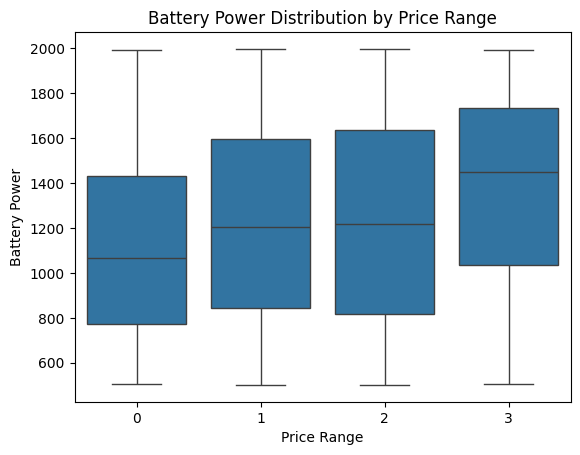

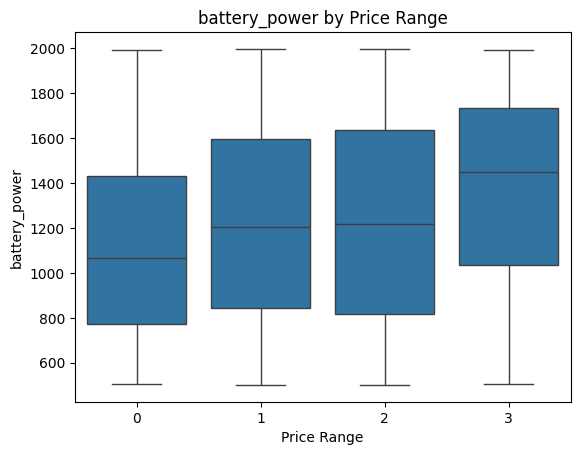

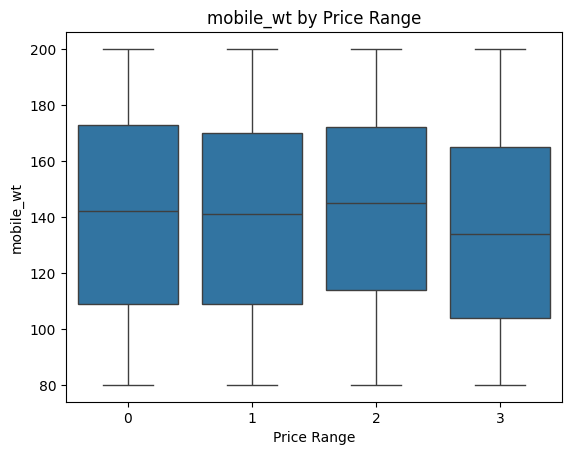

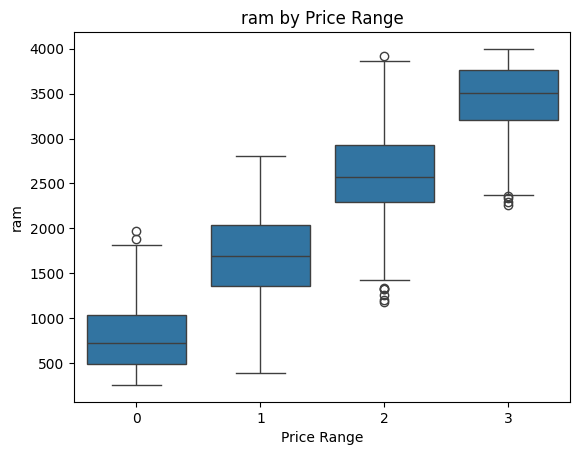

In [21]:
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()
#Use boxplots for multiple features if needed:

for col in ['battery_power', 'mobile_wt', 'ram']:
    plt.figure()
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'{col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    plt.show()

As a conclusion:
- RAM is the top factor affecting mobile price, showing the strongest link in all models and studies.
- Storage, battery, and screen resolution also matter but have a smaller impact.
- Data tests confirm that RAM, storage, and battery are the main price drivers.
- Surprising patterns: battery can lower price in some cases; camera and screen size matter less than expected.